# Autoencoders

2 phases:
1. Encoding
2. Decoding

# First Use Case: Denoising Images!

In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Sequential

import numpy as np
import matplotlib.pyplot as plt

# Loading the Data

In [2]:
# Not need for the test here 
(x_train, _), (x_test, _) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [3]:
#  the conversion to float32 and normaliza between 0 and 1
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

In [4]:
x_train[0].shape

(28, 28)

In [5]:
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [6]:
x_train[0].shape

(28, 28, 1)

## Adding Noise to the images!

In [7]:
#adding some noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

In [8]:
# i need to clip to highlight the images!
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

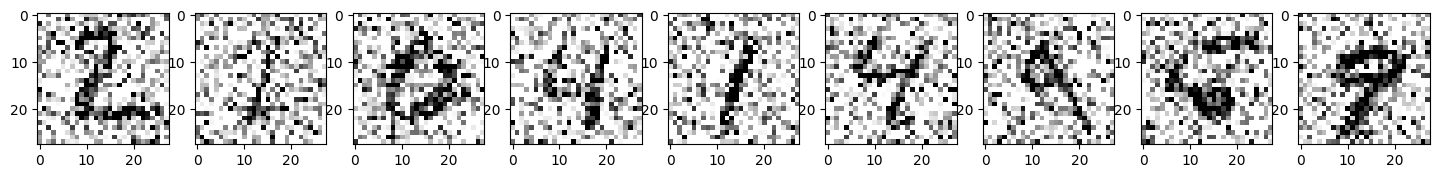

In [9]:
#Displaying images with noise
plt.figure(figsize=(20, 2))
for i in range(1,10):
    ax = plt.subplot(1, 10, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap="binary")
plt.show()

# Defining the Autoencoder!

In [10]:
model = Sequential()
#32 is the number of filters!
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
 

model.add(MaxPooling2D((2, 2), padding='same'))
 
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(1, (3, 3), activation='relu', padding='same'))

## The Loss is the Mean squared Error!
model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()

/Users/simoneboesso/Desktop/nuclei-segmentation/nuclei/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 8)      │         2,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 8)        │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 4, 4, 8)        │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 8, 8, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 8)        │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 16, 16, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 14, 14, 32)     │         2,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_2 (UpSampling2D)  │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 28, 28, 1)      │           289 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,009 (27.38 KB)

 Trainable params: 7,009 (27.38 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.fit(x_train_noisy, x_train, epochs=10, batch_size=256, shuffle=True, 
          validation_data=(x_test_noisy, x_test))

model.evaluate(x_test_noisy, x_test)

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 18s 74ms/step - loss: 0.0705 - val_loss: 0.0427
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 17s 73ms/step - loss: 0.0404 - val_loss: 0.0349
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 16s 69ms/step - loss: 0.0339 - val_loss: 0.0305
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 16s 69ms/step - loss: 0.0303 - val_loss: 0.0289
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 16s 69ms/step - loss: 0.0286 - val_loss: 0.0272
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 17s 71ms/step - loss: 0.0275 - val_loss: 0.0265
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 16s 70ms/step - loss: 0.0267 - val_loss: 0.0258
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 16s 69ms/step - loss: 0.0261 - val_loss: 0.0252
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 17s 70ms/step - loss: 0.0255 - val_loss: 0.0247
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 16s 69ms/step - loss: 0.0251 - val_loss: 0.0243
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0245


0.02438548393547535

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


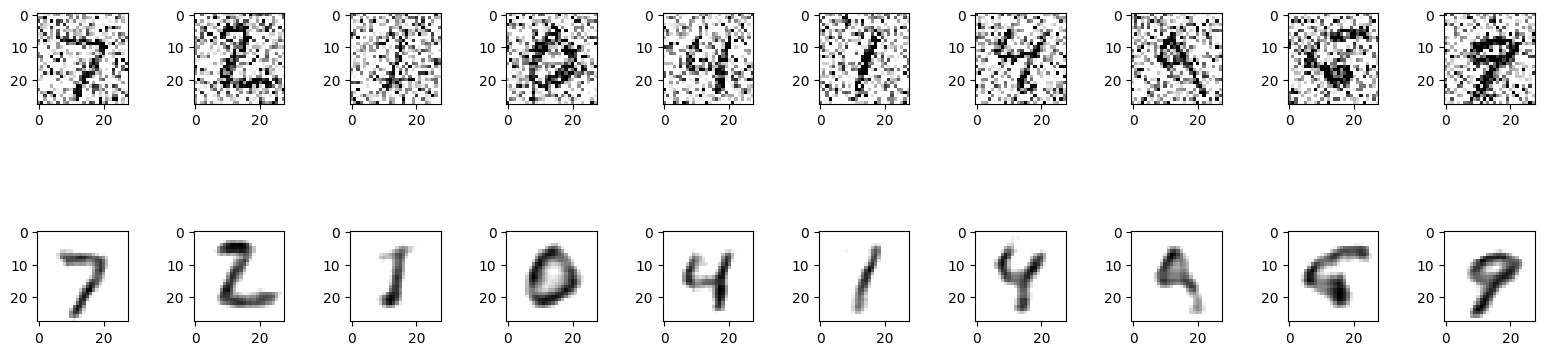

In [12]:
no_noise_img = model.predict(x_test_noisy)

plt.figure(figsize=(40, 4))
for i in range(10):
    # display original
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap="binary")
    
    # display reconstructed (after noise removed) image
    ax = plt.subplot(3, 20, 40 +i+ 1)
    plt.imshow(no_noise_img[i].reshape(28, 28), cmap="binary")

plt.show()

# Domain Adaptation!

In [1]:
from matplotlib.pyplot import imshow
import numpy as np
import cv2
from keras.preprocessing.image import img_to_array
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Sequential
import os

SIZE=256

In [9]:
from tqdm import tqdm
img_data=[]
path1 = "/Users/simoneboesso/Desktop/nuclei-segmentation/image-processing/images/einstein_mona_lisa/einstein/"
files=os.listdir(path1)
print(files)
print("qui")
for i in tqdm(files):
    img=cv2.imread(path1+'/'+i,1)   #Change 0 to 1 for color images
    img=cv2.resize(img,(SIZE, SIZE))
    img_data.append(img_to_array(img))

['einstein_Transl_-45_-45.jpg', 'einstein_flip_V.jpg', 'einstein_Transl_-15_-15.jpg', 'einstein_Rotate45.jpg', 'einstein_90L.jpg', 'einstein_Transl_15_15.jpg', 'einstein_Rotate-45.jpg', 'einstein_90R.jpg', 'einstein_Transl_45_45.jpg', 'einstein_flip_H_V.jpg', 'einstein_flip_H.jpg']
qui


100%|██████████| 11/11 [00:00<00:00, 626.89it/s]


In [10]:
img2_data=[]
path2 = "/Users/simoneboesso/Desktop/nuclei-segmentation/image-processing/images/einstein_mona_lisa/monalisa"
files=os.listdir(path2)
for i in tqdm(files):
    img=cv2.imread(path2+'/'+i,1)  #Change 0 to 1 for color images
    img=cv2.resize(img,(SIZE, SIZE))
    img2_data.append(img_to_array(img))

100%|██████████| 11/11 [00:00<00:00, 708.58it/s]


In [11]:
img_array = np.reshape(img_data, (len(img_data), SIZE, SIZE, 3))
img_array = img_array.astype('float32') / 255.

img_array2 = np.reshape(img2_data, (len(img2_data), SIZE, SIZE, 3))
img_array2 = img_array2.astype('float32') / 255.


In [16]:
#Original einstein image for prediction as monalisa
img_data3=[]

img3=cv2.imread('/Users/simoneboesso/Desktop/nuclei-segmentation/image-processing/images/einstein_mona_lisa/einstein_original.jpg', 1)   #Change 0 to 1 for color images
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)#Changing BGR to RGB to show images in true colors
img3=cv2.resize(img3,(SIZE, SIZE))
img_data3.append(img_to_array(img3))

img_array3 = np.reshape(img_data3, (len(img_data3), SIZE, SIZE, 3))
img_array3 = img_array3.astype('float32') / 255.

In [ ]:
import time
start=time.time()

In [17]:
import time
start=time.time()


model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(SIZE, SIZE, 3)))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
 

model.add(MaxPooling2D((2, 2), padding='same'))
     
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(3, (3, 3), activation='relu', padding='same'))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
model.summary()

/Users/simoneboesso/Desktop/nuclei-segmentation/nuclei/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 256, 256, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 8)    │         2,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 64, 64, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 8)      │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 32, 32, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 8)      │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 64, 64, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 64, 64, 8)      │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 128, 128, 8)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 128, 128, 32)   │         2,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_2 (UpSampling2D)  │ (None, 256, 256, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 256, 256, 3)    │           867 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,163 (31.89 KB)

 Trainable params: 8,163 (31.89 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
import tensorflow as tf

callbacks = [tf.keras.callbacks.TensorBoard(log_dir='einstein_logs')]


model.fit(img_array, img_array2,
        epochs=100000,
        shuffle=True,
        callbacks=callbacks)

finish=time.time()
print('total_time = ', finish-start)

model.save('einstein_autoencoder.model')

print("Output")
pred = model.predict(img_array3)



imshow(pred[0].reshape(SIZE,SIZE,3))

Epoch 1/100000
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.2015 - loss: 0.1193
Epoch 2/100000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step - accuracy: 0.2026 - loss: 0.1177
Epoch 3/100000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step - accuracy: 0.2013 - loss: 0.1148
Epoch 4/100000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step - accuracy: 0.2011 - loss: 0.1115
Epoch 5/100000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step - accuracy: 0.2011 - loss: 0.1071
Epoch 6/100000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step - accuracy: 0.2008 - loss: 0.1018
Epoch 7/100000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step - accuracy: 0.2007 - loss: 0.0963
Epoch 8/100000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step - accuracy: 0.2007 - loss: 0.0922
Epoch 9/100000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step - accuracy: 0.2007 - loss: 0.0911
Epoch 10/100000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step - accuracy: 0.2012 - loss: 0.0897
Epoch 11/100000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step - accuracy: 0.2229 - loss: 0.0866
Epoch 12/100000
1/1 ━━━━━━━━━━━━━

KeyboardInterrupt: 